Seaborn的回归图主要是为了添加一个视觉指南，有助于在探索性数据分析期间强调数据集中的模式。

In [2]:
sum(map(ord, "regression"))

1089

In [4]:
ord()

101

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "regression")))

tips = sns.load_dataset("tips")

seaborn画线性关系主要通过两个函数regplot和lmplot

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

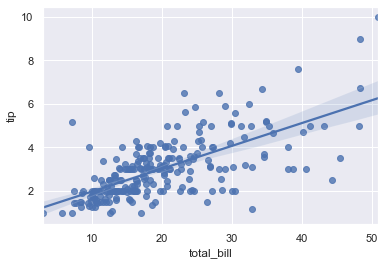

In [3]:
# 在最简单的调用中，两个函数绘制了两个变量x和y的散点图，然后拟合回归模型y〜x并绘制了该回归线的结果回归线和95％置信区间
sns.regplot(x='total_bill', y='tip', data=tips)

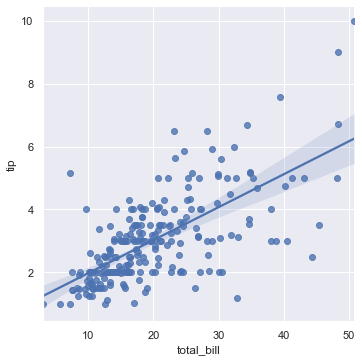

In [4]:
# linear model
sns.lmplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

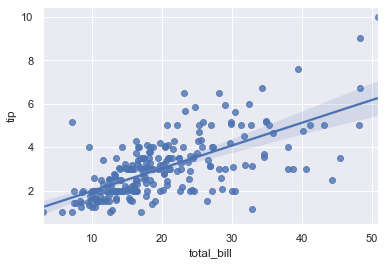

In [5]:
sns.regplot(x=tips['total_bill'], y=tips['tip']) # regplot的data参数不是必须的

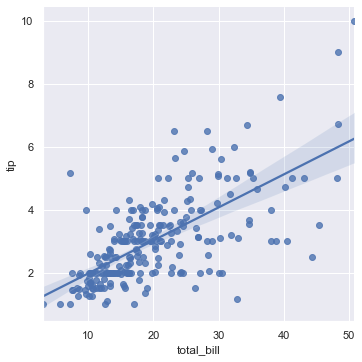

In [6]:
# lmplot的data参数是必须的
sns.lmplot(x='total_bill', y='tip', data=tips)

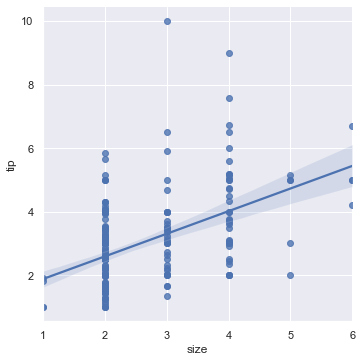

In [7]:
sns.lmplot(x="size", y="tip", data=tips,  )

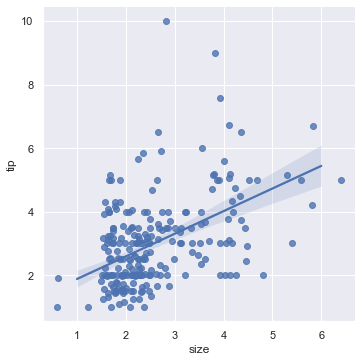

In [8]:
# 给x轴数据添加了抖动
sns.lmplot(x="size", y="tip", data=tips,  x_jitter=.5)

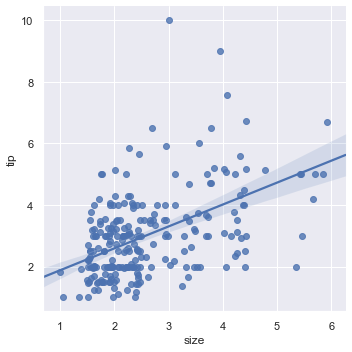

In [10]:
# 给这些离散的值加上一些随机的抖动 值越大,抖动越明显
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.5)

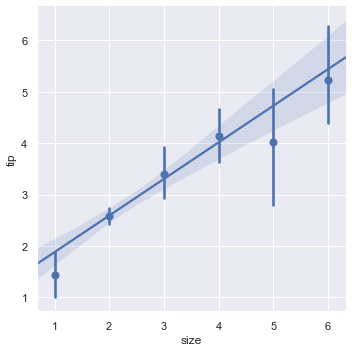

In [13]:
# 另一种选择是在每个独立的数据分组中对观察结果进行折叠，以绘制中心趋势的估计以及置信区间：
# 算出每组数据的平均值
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

1973年，统计学家F.J. Anscombe构造出了四组奇特的数据。它告诉人们，在分析数据之前，描绘数据所对应的图像有多么的重要。
这四组数据中，x值的平均数都是9.0，y值的平均数都是7.5；x值的方差都是10.0，y值的方差都是3.75；它们的相关度都是0.816，线性回归线都是y=3+0.5x。单从这些统计数字上看来，四组数据所反映出的实际情况非常相近，而事实上，这四组数据有着天壤之别。

把它们描绘在图表中，你会发现这四组数据是四种完全不同的情况。第一组数据是大多人看到上述统计数字的第一反应，是最“正常”的一组数据；第二组数据所反映的事实上是一个精确的二次函数关系，只是在错误地应用了线性模型后，各项统计数字与第一组数据恰好都相同；第三组数据描述的是一个精确的线性关系，只是这里面有一个异常值，它导致了上述各个统计数字，尤其是相关度值的偏差；第四组数据则是一个更极端的例子，其异常值导致了平均数、方差、相关度、线性回归线等所有统计数字全部发生偏差。


In [9]:
anscombe = sns.load_dataset('anscombe')

In [10]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


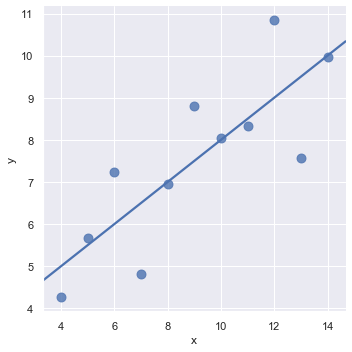

In [13]:
# 第一组数据, ci是置信区间,设置为None就是不计算置信区间
sns.lmplot(x='x', y='y', data=anscombe.query('dataset=="I"'), ci=None, scatter_kws={'s':80})

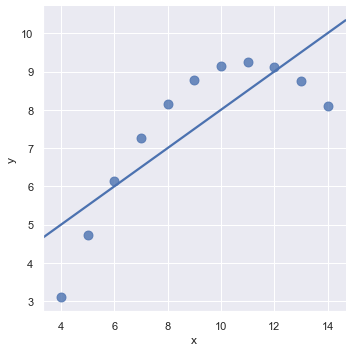

In [14]:
# 第二组数据
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

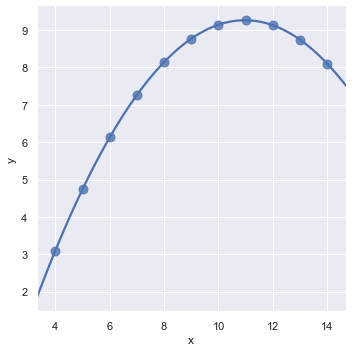

In [15]:
# 在存在这些高阶关系的情况下，lmplot()和regplot()可以拟合多项式回归模型来拟合数据集中的简单类型的非线性趋势
# order 大于1表示绘制多项式回归
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

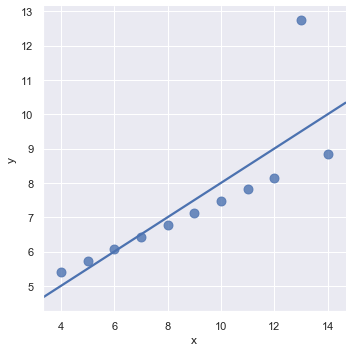

In [16]:
# 第三组数据,有一个异常值
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

In [1]:
!pip install statsmodels -i https://pypi.douban.com/simple

Looking in indexes: https://pypi.douban.com/simple


You should consider upgrading via the 'C:\Users\ause\Desktop\Python2101\2101\env\Scripts\python.exe -m pip install --upgrade pip' command.


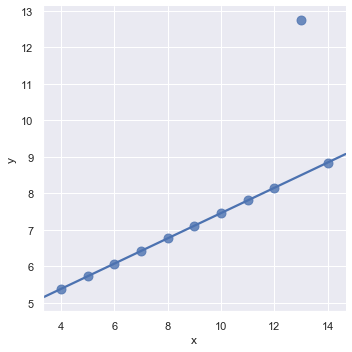

In [19]:
# 在有异常值的情况下，它可以使用不同的损失函数来减小相对较大的残差，拟合一个健壮的回归模型，传入robust=True
# 加了robust,需要安装statsmodels模块.
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

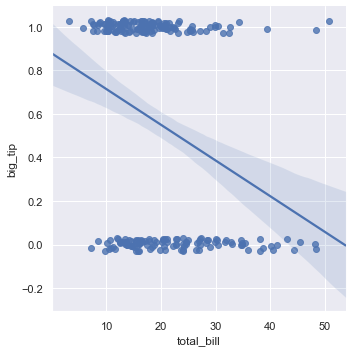

In [20]:
# 当y变量是二进制时，简单的线性回归也“工作”了，但提供了不可信的预测结果
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)

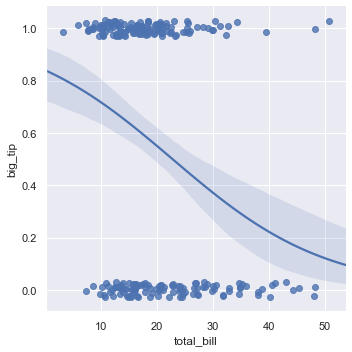

In [21]:
# 在这种情况下，解决方案是拟合逻辑(Logistic)回归，使得回归线显示给定值x的y=1的估计概率
# logistic=True, 会把线性回归的变成逻辑回归,y值变成概率.
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);
# 注意, 加了logistic=True和robust=True,最好把ci关掉,以获得更快的迭代次数;

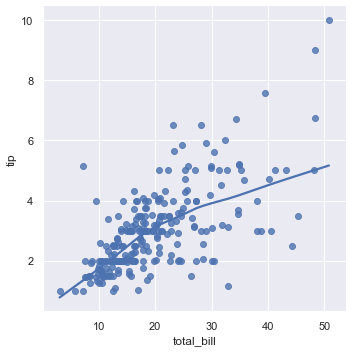

In [19]:
# locally weighted scatterplot smoother   LOWESS 
# locally —— 局部
# weighted —— 加权
# smoother —— 平滑
# scatterplot —— 散点
# 使用一个lowess smoother拟合非参数回归。 这种方法具有最少的假设，因为它是计算密集型的，因此目前根本不计算置信区间
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

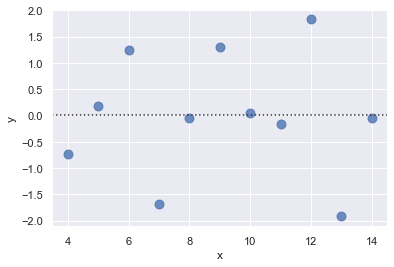

In [20]:
# residplot()是一个有用的工具，用于检查简单的回归模型是否拟合数据集。它拟合并移除一个简单的线性回归，然后绘制每个观察值的残差值。 理想情况下，这些值应随机散布在y = 0附
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})
# 意思就是说有线性关系的话,就在0左右随机分布.

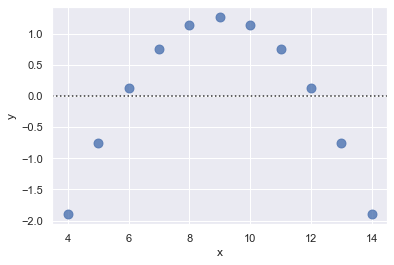

In [21]:
# 如果残差中有结构，则表明简单的线性回归是不合适的
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80})

上面的图表探索的是一对变量之间的关系.然而，通常，一个更有趣的问题是“这两个变量之间的关系如何作为第三个变量的函数而变化？”
也就是说在两个变量中引入第三个变量,

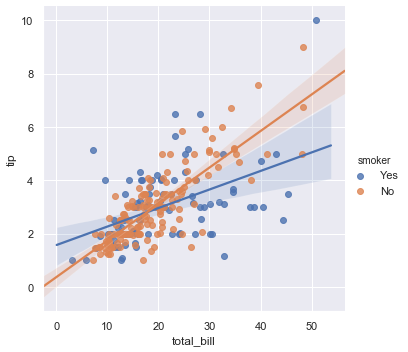

In [4]:
# 引入第三个变量通过hue,hue只能通过lmplot, regplot没有这个参数.
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

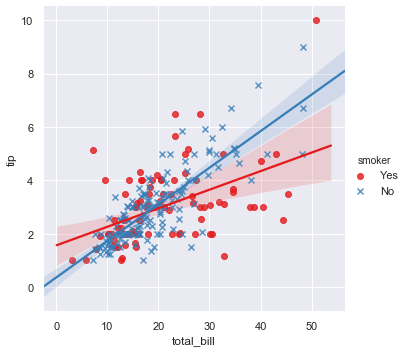

In [5]:
# 更多参数和颜色的控制
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, markers=['o', 'x'], palette='Set1')

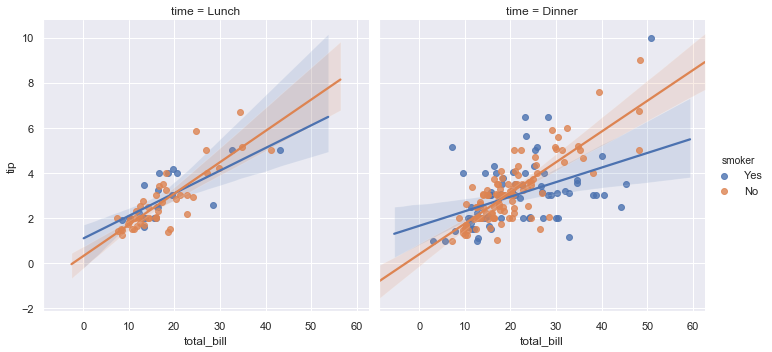

In [6]:
# 加入第四个变量
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, col='time')

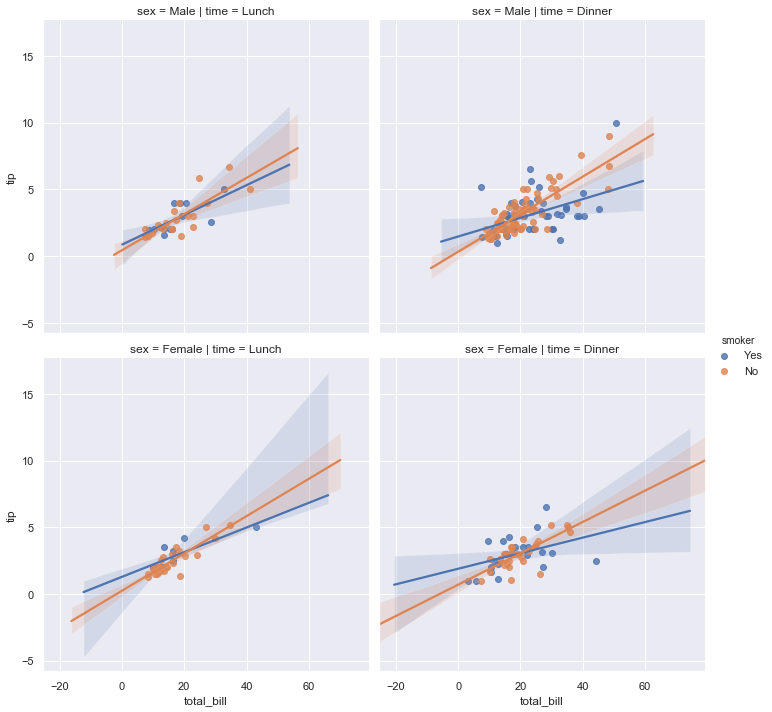

In [7]:
# 加入第五个变量
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, col='time', row='sex')

## 控制绘制的大小和形状

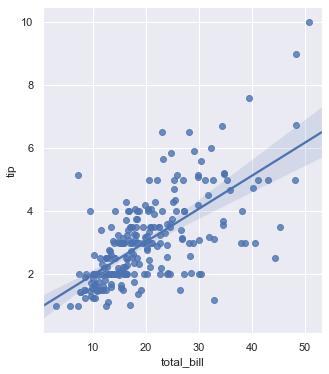

In [8]:
# regplot是一个“轴级”功能绘制到特定的轴上
f, ax = plt.subplots(figsize=(5,6))
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax)

In [13]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

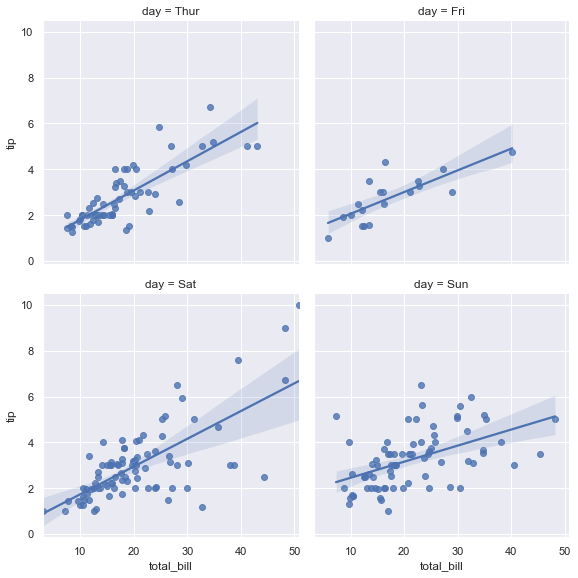

In [18]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, col_wrap=2, height=4, aspect=1)
# aspect 横纵比, 宽度和高度的比例.

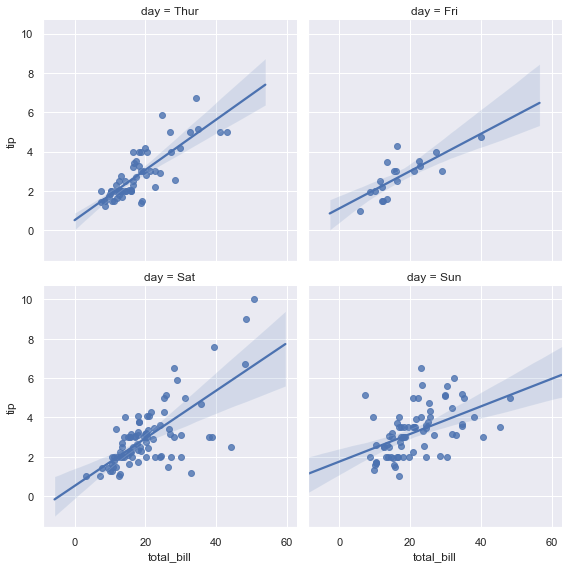

In [24]:
# 相反，lmplot()图的大小和形状通过FacetGrid界面使用size和aspect参数进行控制，这些参数适用于每个图中的设置，而不是整体图形
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=4, aspect=1)
# col_wrap表示列数,height表示每一个图的高度
# aspect 横纵比.

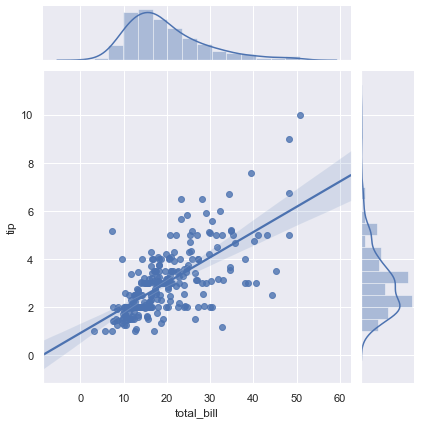

In [19]:
# 线性回归用在jointplot中
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

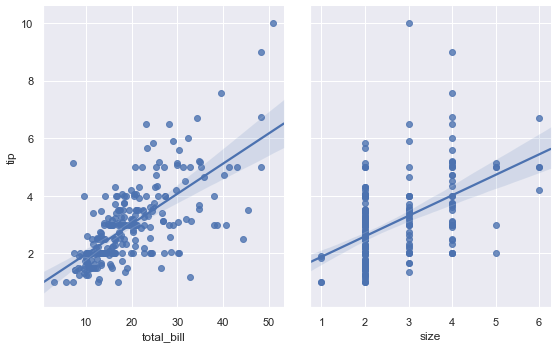

In [21]:
# 和pariplot一起用.
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'], height=5, aspect=.8, kind='reg')

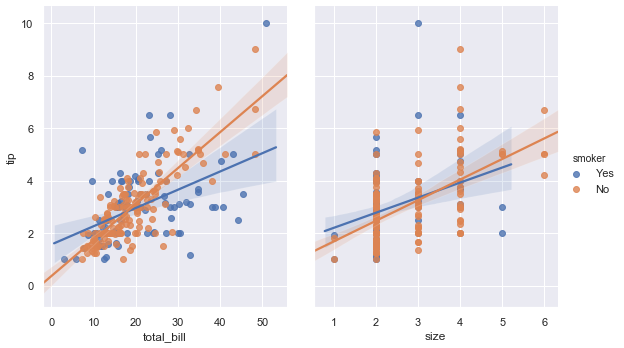

In [23]:
# 在pairplot中引入第三个变量
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'], height=5, aspect=.8,hue='smoker', kind='reg')